In [1]:
from stats.utils import get_win_probability

def p_left(a, b):
    def helper(alpha, beta):
        a1 = alpha * a
        a2 = (1 - alpha) * a
        b1 = beta * b
        b2 = (1 - beta) * b
        return get_win_probability([a1, a2], [b1, b2], "test")[0]
    
    return helper

In [2]:
import numpy as np

def get_grid_values(a, b):
    x = np.linspace(0.0001, 0.9999)
    y = np.linspace(0.0001, 0.9999)
    xgrid, ygrid = np.meshgrid(x, y)
    zgrid = np.empty((x.shape[0], y.shape[0]))
    for i, val_x in enumerate(x):
        for j, val_y in enumerate(y):
            zgrid[i, j] = p_left(a, b)(val_x, val_y)
    return xgrid, ygrid, zgrid

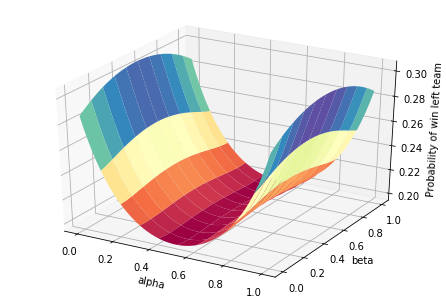

In [3]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

a = 1
b = 2.5

x, y, z = get_grid_values(a, b)

fig = pylab.figure()
axes = Axes3D(fig)

axes.plot_surface(x, y, z, 
                  rstride=5, cstride=5,
                  cmap = cm.Spectral)
axes.set_xlabel("alpha")
axes.set_ylabel("beta")
axes.set_zlabel("Probability of win left team")
pylab.show()

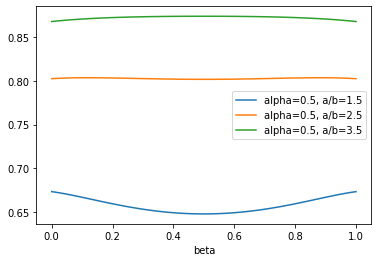

In [10]:
import matplotlib.pyplot as plt

alpha = 0.5
b = 1
for a in [1.5, 2.5, 3.5]:
    beta = np.linspace(0, 1)
    v = [p_left(a, b)(alpha, _beta) for _beta in beta]

    plt.plot(beta, v, label=f"alpha={alpha}, a/b={a/b}")
plt.xlabel("beta")
plt.legend()
plt.show()

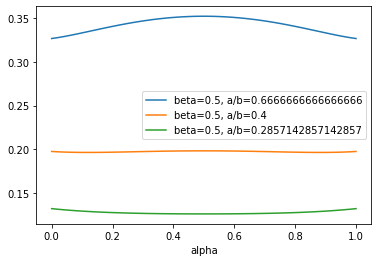

In [9]:
beta = 0.5
a = 1
for b in [1.5, 2.5, 3.5]:
    alpha = np.linspace(0, 1)
    v = [p_left(a, b)(_alpha, beta) for _alpha in alpha]

    plt.plot(alpha, v, label=f"beta={beta}, a/b={a/b}")
plt.xlabel("alpha")
plt.legend()
plt.show()